In [54]:
# Import Pandas, Numpy and Scipy
import pandas as pd
import numpy as np
from numpy import *
from numpy.linalg import multi_dot
from scipy.stats import norm

# Import matplotlib for visualization
import matplotlib
import matplotlib.pyplot as plt

# Plot settings
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 2.0

# Import cufflinks for visualization
import cufflinks as cf
cf.set_config_file(
    offline=True, 
    dimensions=((1000,600)),
    theme= 'henanigans')
# Import plotly
import plotly
import plotly.express as px
px.defaults.template = "plotly_dark"
px.defaults.width = 1000
px.defaults.height = 600
import plotly.graph_objects as go

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Simulation

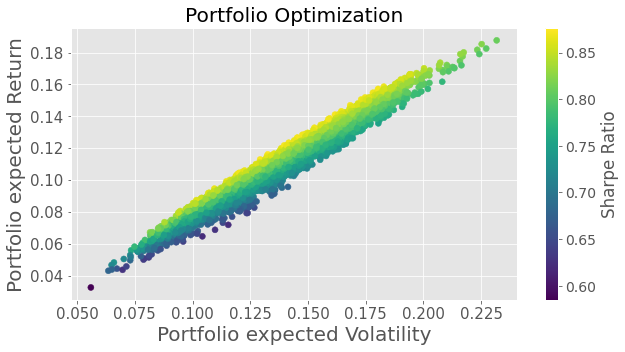

In [61]:

nbr_of_portfolio = 5000
mu = np.array([0.02,0.07,0.15,0.20])
numofasset = len(mu)
RF = 0

#list 

portfolio_returns = []
portfolio_risk = []
portfolio__weights = []
sharpe_ratios = []

# Data manipulation 

for portfolio in range(nbr_of_portfolio):
    # Generate rdm portfolio weights
    weights = np.random.random_sample(numofasset)
    weights = np.round((weights / np.sum(weights)),4)
    portfolio__weights.append(weights)
    # Calculate annualized return
    annualized_return = np.sum(mu * weights)
    portfolio_returns.append(annualized_return)
    # Matrix cov and risk 
    matrix_cov = SRS 
    portfolio_var = np.dot(weights.T, np.dot(matrix_cov, weights))
    portfolio_sd = np.sqrt(portfolio_var)
    portfolio_risk.append(portfolio_sd)
    # Sharpe /ratio
    sharpe_ratio = (annualized_return-RF)/ portfolio_sd
    sharpe_ratios.append(sharpe_ratio)

portfolio_returns

portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risk)
sharpe_ratios = np.array(sharpe_ratios)

portfolio_metrics = [portfolio_returns, portfolio_risk, sharpe_ratios, portfolio__weights]
portfolios_df = pd.DataFrame(portfolio_metrics).T
portfolios_df.columns = ['Return','Risk', 'Sharpe', 'weights']

#Plot

plt.figure(figsize = (10,5))
plt.scatter(portfolio_risks, portfolio_returns, c = portfolio_returns / portfolio_risks)

plt.title('Portfolio Optimization')
plt.xlabel('Portfolio expected Volatility', fontsize=20)
plt.ylabel('Portfolio expected Return', fontsize= 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize= 15)
plt.colorbar(label= 'Sharpe Ratio')
plt.show()


In [62]:
# Import optimization module from scipy
import scipy.optimize as sco

In [63]:
# mu matrix

mu_2 = np.array([0.02,0.07,0.15,0.20])
mu_2 = mu_2.reshape((4,1))

# sigma matrix

sigma_2 = np.array([0.05,0.12,0.17,0.25])
sigma_2 = sigma_2.reshape(4,1)
# R matrix

R_2 = np.array([1,0.3,0.3,0.3,0.3,1,0.6,0.6,0.3,0.6,1,0.6,0.3,0.6,0.6,1])
R_2 = R_2.reshape((4,4))

# Covariance Matrix

SRS_2 = sigma_2.T * R_2 * sigma_2

# 1 matrix

one_m2 = np.array([1,1,1,1])
one_m2 = one_m2.reshape((4,1))

#A, B, C computation 

A_x = np.dot(one_m2.T,np.dot(np.linalg.inv(SRS_2),one_m2))
B_x = np.dot(mu_2.T,np.dot(np.linalg.inv(SRS_2),one_m2))
C_x = np.dot(mu_2.T,np.dot(np.linalg.inv(SRS_2),mu_2))

A_x, B_x, C_x

(array([[423.61498069]]), array([[6.80702072]]), array([[0.90650893]]))

In [64]:
#Risk free rate 50bps

rf = 0.005

# lambda computation

lambda_2 = (0.045-rf)/ np.dot((mu_2 - rf *one_m2).T, np.dot(np.linalg.inv(SRS_2), mu_2 - rf *one_m2))

# Optimal Weights
# w_star = lambda_2 * np.dot(np.linalg.inv(SRS_2),(mu_2 - rf * one_m2))

w_star = (np.dot(np.linalg.inv(SRS_2),(mu_2 - rf * one_m2))/(B_x - A_x*rf))

#Portfolio risk 

Risk = np.sqrt((np.dot(w_star.T,np.dot(SRS,w_star))))

lambda_2, w_star, Risk

(array([[0.04711264]]),
 array([[ 0.0168352 ],
        [-0.22936698],
        [ 0.81434026],
        [ 0.39819152]]),
 array([[0.20738394]]))

In [65]:
#Risk free rate 100bps

rf = 0.01

# lambda computation

lambda_2 = (0.045-rf)/ np.dot((mu_2 - rf *one_m2).T, np.dot(np.linalg.inv(SRS_2), mu_2 - rf *one_m2))

# Optimal Weights

w_star = (np.dot(np.linalg.inv(SRS_2),(mu_2 - rf * one_m2))/(B_x - A_x*rf))
#Portfolio risk 

Risk = np.sqrt((np.dot(w_star.T,np.dot(SRS,w_star))))

lambda_2, w_star, Risk

(array([[0.04306473]]),
 array([[-0.74593711],
        [-0.51056937],
        [ 1.49024934],
        [ 0.76625714]]),
 array([[0.36254276]]))

In [66]:
#Risk free rate 150bps

rf = 0.015

# lambda computation

lambda_2 = (0.045-rf)/ np.dot((mu_2 - rf *one_m2).T, np.dot(np.linalg.inv(SRS_2), mu_2 - rf *one_m2))

# Optimal Weights

w_star = (np.dot(np.linalg.inv(SRS_2),(mu_2 - rf * one_m2))/(B_x - A_x*rf))

#Portfolio risk 

Risk = np.sqrt((np.dot(w_star.T,np.dot(SRS,w_star))))

lambda_2, w_star, Risk

(array([[0.03761229]]),
 array([[-8.64485405],
        [-3.42257114],
        [ 8.48965087],
        [ 4.57777433]]),
 array([[1.99032373]]))

In [67]:
#Risk free rate 175bps

rf = 0.0175

# lambda computation

lambda_2 = (0.045-rf)/ np.dot((mu_2 - rf *one_m2).T, np.dot(np.linalg.inv(SRS_2), mu_2 - rf *one_m2))

# Optimal Weights

w_star = (np.dot(np.linalg.inv(SRS_2),(mu_2 - rf * one_m2))/(B_x - A_x*rf))

#Portfolio risk 

Risk = np.sqrt((np.dot(w_star.T,np.dot(SRS,w_star))))

w_star, Risk

(array([[ 8.10350247],
        [ 2.75185052],
        [-6.3514309 ],
        [-3.50392209]]),
 array([[1.4675384]]))

In [68]:
# mu matrix

mu_3 = np.array([0.02,0.07,0.15,0.20])
mu_3 = mu_3.reshape((4,1))

# sigma matrix

sigma_3 = np.array([0.05,0.12,0.17,0.25])
sigma_3 = sigma_3.reshape(4,1)

# R matrix

R_3 = np.array([1,0.3,0.3,0.3,0.3,1,0.6,0.6,0.3,0.6,1,0.6,0.3,0.6,0.6,1])
R_3 = R_3.reshape((4,4))

# Covariance Matrix

SRS_3 = sigma_3.T * R_3 * sigma_3

In [69]:
numofassets = 4
RF = 0.01
wts = np.array(numofassets * [1./numofassets])[:,newaxis]
var = multi_dot([wts.T, SRS_3,  wts])

numofport = 10000
def portfolio_simulation(returns):
    rets=[]; vols=[]; wts=[]
    for i in range(numofport):
        weights = random.random(numofassets)[:,newaxis]
        weights /= sum(weights)
        rets.append(weights.T @ mu_3)
        vols.append(np.sqrt(multi_dot([weights.T, SRS_3,weights])))
        wts.append(weights.flatten())
    portdf = pd.DataFrame({
        'port_rets': array(rets).flatten(),
        'port_vols': array(vols).flatten(),
        'weights': list(array(wts))
        })
    portdf['sharpe_ratio'] = (portdf['port_rets'] -RF)/portdf['port_vols']
    return round(portdf,4)

temp = portfolio_simulation(mu_3)

In [70]:
# Define portfolio stats function
def portfolio_stats(weights):
    
    weights = array(weights)[:,newaxis]
    port_rets =  array(weights.T @ mu_3)   
    port_vols = np.sqrt(multi_dot([weights.T, SRS_3, weights])) 
    
    return array([port_rets, port_vols, (port_rets-RF)/port_vols]).flatten()

# Maximizing sharpe ratio

def min_sharpe_ratio(weights):
    return -portfolio_stats(weights)[2]
# Specify constraints and bounds
cons = ({'type': 'eq', 'fun': lambda x: sum(x) - 1})
bnds = tuple((0, 1) for x in range(numofassets))
initial_wts = numofassets*[1./numofassets]

# Optimizing for maximum sharpe ratio

opt_sharpe = sco.minimize(min_sharpe_ratio, initial_wts, method='SLSQP', bounds=bnds, constraints=cons)
# Minimize the variance

def min_variance(weights):
    return portfolio_stats(weights)[1]**2
opt_var = sco.minimize(min_variance, initial_wts, method='SLSQP', bounds=bnds, constraints=cons)

# Minimize the volatility

def min_volatility(weights):
    return portfolio_stats(weights)[1]

# Efficient frontier params

targetrets = linspace(0.02,0.20,1000)
tvols = []

for tr in targetrets:
    
    ef_cons = ({'type': 'eq', 'fun': lambda x: portfolio_stats(x)[0] - tr},
               {'type': 'eq', 'fun': lambda x: sum(x) - 1})
    
    opt_ef = sco.minimize(min_volatility, initial_wts, method='SLSQP', bounds=bnds, constraints=ef_cons)
    
    tvols.append(opt_ef['fun'])

targetvols = array(tvols)

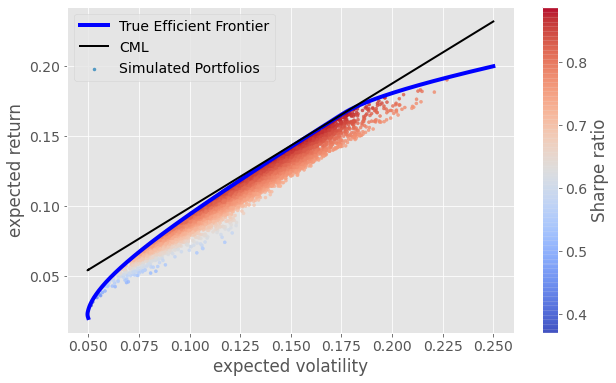

In [71]:
# Dataframe for EF

efport = pd.DataFrame({
    'targetrets' : targetrets,
    'targetvols': targetvols,
    'targetsharpe': (targetrets - RF)/targetvols
})

# CML

x= targetvols
y = RF + portfolio_stats(opt_sharpe['x'])[2] * targetvols

# Plot 

plt.figure(figsize=(10, 6))
plt.scatter(temp['port_vols'], temp['port_rets'], c=(temp['port_rets'] - RF) / temp['port_vols'],marker='.', alpha=0.8, cmap='coolwarm', label = 'Simulated Portfolios')
plt.plot(targetvols, targetrets, 'b', lw=4.0, label = 'True Efficient Frontier')
plt.plot(x,y, color = 'black', label = 'CML')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend()
plt.colorbar(label='Sharpe ratio')